## Goal of the project and this tutorial (Complete)
-explain time contraints and the fact that had to spend most of time getting data and datascraping


## Gathering Data 


Publically available data containing movie/tv shows genres, rating, year gross, and year of release has already been collected by various reputable sources. We chose to investigate the IMDb Datasets (https://www.imdb.com/interfaces/) and the BoxOfficeMojo Domestic Yearly Box Office dataset (https://www.boxofficemojo.com/year/?grossesOption=calendarGrosses). These datasets have movie data going back all the way to 1874. The datasets also contain a wide range of potentially interesting data including: if it's an Adult movie, the production year, other(potentially foriegn) titles,names of directors, names of writers, etc. Another big positive to working with these datasets is that they are completely free to the public.  


Meanwhile with other media datasets, while they are just as extensive as IMDb, they would require a payment to get the complete dataset and not just a sample. For instance, another database we were considering using was The Numbers (https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/2501). However, we realised to get the data we required we would have to pay $475. 



## Data Processing


There times when the data you recieve from the databases are not in the correct format. Or, in a format that is difficult for the system to comprehend/handle. 

We will be using three datasets from IMDb. We must use three datasets instead of one since each dataset has relevant data to our question. However, there isn't one already made dataset that has all the information. As a result, we must upload all three databases, get the relevant infomation for each, and then combine the relavent data into one dataframe. 

As mentioned in the Gathering Data section, one positive to IMDb Datasaets is that we would have a large dataset to analyze and explore. However, it is also a negative. Because it is so large (a total of 710 MB!!), it is impossible for most laptops/computers to process the data all at once. As a result, it must be condensed to only contain data we think may be relavent in future analysis and must be proccessed in chunks. 

NOTE: This is a common problem in data science and would most likely need to be addressed when you do data science analysis in the future.


#### Getting the IMDb dataframes

In [1]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup

#dictates the number of rows each data frame should have
chunksize = 100000

# the list that contains all the dataframes
list_of_dataframes = []

#Seperates title.basics.tsv into chunks with 100000 rows with the header of row 0.
#The columns of the dataframes would be tconst, originalTitle, startYear (publication year), 
#and genres data. each chunck is added to list_of_dataframes
for df in pd.read_csv("title.basics.tsv", sep='\t', chunksize=chunksize, 
                       header=0, usecols=['tconst', 'primaryTitle', 'genres', 'startYear', 'endYear']):
      list_of_dataframes.append(df)
        
#concats all the chunck dataframes to make one combined        
data1 = pd.concat(list_of_dataframes)

/Users/aaddeh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data1.head()

,tconst,primaryTitle,startYear,endYear,genres
0,tt0000001,Carmencita,1894,\N,"Documentary,Short"
1,tt0000002,Le clown et ses chiens,1892,\N,"Animation,Short"
2,tt0000003,Pauvre Pierrot,1892,\N,"Animation,Comedy,Romance"
3,tt0000004,Un bon bock,1892,\N,"Animation,Short"
4,tt0000005,Blacksmith Scene,1893,\N,"Comedy,Short"


Each production instance/row has the following features/attributes: 
* tconst  - IMDb's alphanumeric unique identifier of the movie title
* primaryTitle  – the more popular movie title / the movietitle used by the filmmakers on promotional     materials at the point of release
* startYear  – represents the release year of a movie title.  In the case of TV Series, it is the series start year
* endYear  – TV Series end year. ‘\N’ for all other title types
* genres – includes up to three genres associated with the title

All of them are object types.





In [3]:
#makes a dataframe from the data in the title.ratings.tsv database
#averageRating is the average IMDb rating , numVotes is the number of IMDd
#votes the movie recieved
data2= pd.read_csv("title.ratings.tsv", sep='\t')
data2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1718
1,tt0000002,6.0,211
2,tt0000003,6.5,1480
3,tt0000004,6.1,124
4,tt0000005,6.2,2283


Each movie instance/row has the following features/attributes: 
* tconst - IMDb's alphanumeric unique identifier of the movie title (same as dataframe above)
* averageRating  – weighted average of all the individual user ratings
* numVotes  - number of votes the title has received

All of them are object types.


In [4]:
#makes a dataframe from a portion of data in the data.tsv database
#it only collects the columns of titleID and region and puts that in a dataframe
data3= pd.read_csv("data.tsv", sep='\t', usecols=['titleId', 'region'])

# gets all the rows with the region being US 
data3 = data3[data3['region'] == 'US']

#removes the region column since it is no longer needed
data3=data3.drop(columns=['region'])

data3.head()

,titleId
5,tt0000001
14,tt0000002
35,tt0000005
39,tt0000005
40,tt0000005


Each movie instance/row has the following features/attributes: 
* titleID (object) - IMDb's alphanumeric unique identifier of the movie title (same as dataframe above)



#### Combining the IMDb dataframes (EDIT)

REMEMBER TO TALK ABOUT WHY INNER JOIN

In [5]:
#merges (through inner join) data1 and data2 based on the tconst values
#and makes it a dataframe named partial_data_table
partial_table= pd.merge(data1, data2, on='tconst')
partial_table.head()

,tconst,primaryTitle,startYear,endYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,1894,\N,"Documentary,Short",5.7,1718
1,tt0000002,Le clown et ses chiens,1892,\N,"Animation,Short",6.0,211
2,tt0000003,Pauvre Pierrot,1892,\N,"Animation,Comedy,Romance",6.5,1480
3,tt0000004,Un bon bock,1892,\N,"Animation,Short",6.1,124
4,tt0000005,Blacksmith Scene,1893,\N,"Comedy,Short",6.2,2283


In [6]:
#filters partial_data_table based on weither the row's title constant can be found in data3
#Full_table has all the information (title, genres, averateRating, etc) for only the US productions
full_table=partial_table.loc[partial_table["tconst"].isin(data3["titleId"])] 
full_table.head()


,tconst,primaryTitle,startYear,endYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,1894,\N,"Documentary,Short",5.7,1718
1,tt0000002,Le clown et ses chiens,1892,\N,"Animation,Short",6.0,211
4,tt0000005,Blacksmith Scene,1893,\N,"Comedy,Short",6.2,2283
5,tt0000006,Chinese Opium Den,1894,\N,Short,5.1,127
6,tt0000007,Corbett and Courtney Before the Kinetograph,1894,\N,"Short,Sport",5.5,696


#### Getting the BoxOfficeMojo dataframe

One nice part about the IMDb data is that it has an API that makes retreiving the movie data and converting it to the correct format (for this tutorial that would be Pandas DataFrames) very straight forward. As you see above, we can download the file directly and then read it in to a Datafreame. However, not all website has that capability. For instance, the BoxOfficeMojo Domestic Yearly Box Office dataset does not API. As a result, we will have to use a technique called Data Scraping. 

DataScraping is when we must get the all contents of the website, select the sections that we want to put into a DataFrame, clean up that section if needed so it fits the format of a Datframe, and then we can convert it to a DataFrame. In this instance, the desired section would be the the table containing the Domestic Yearly Box Office dataset. 

In [7]:
source = rq.get('https://www.boxofficemojo.com/year/?grossesOption=calendarGrosses&sort=year&ref_=bo_yl__resort#table')

#gets the structure out of the html text (in form of string)
soup = BeautifulSoup(source.text)

#prints a more human readable version of the soup variable/reading it as HTML
#prints the html formated by BeautifulSoup
print(soup.prettify()) 

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo">
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta charset="utf-8"/>
  <title dir="ltr">
   Domestic Yearly Box Office - Box Office Mojo
  </title>
  <meta content="Domestic Yearly Box Office" name="title"/>
  <meta content="Box Office Mojo" property="og:site_name"/>
  <meta content="https://m.media-amazon.com/images/G/01/boxofficemojo/logo/mojo-logo-bg.png" property="og:image"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://m.media-amazon.com/images/G/01/boxofficemojo/v2/favicon._CB448965889_.ico" rel="icon" type="image/x-icon"/>
  <link href="https://www.boxofficemojo.com/year/?grossesOption=calendarGrosses&amp;sort=year" rel="canonical"/>
  <link href="https://images-na.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41DAFIecsVL.css,51IB+wfP8qL.

In [8]:
#gets the first instance of a table in the BeautifulSoup type since noticed in prettify
#that the first table has the desired data
table = soup.find('table')

#panda reads the table (which is concerted into a string first) and displays the 
#first, and only, table in the dataframe.
movie_gross= pd.read_html(table.prettify())[0]

#renames two of the columns to more appropriate names
movie_gross=movie_gross.rename(columns={"Average": "AverageGrossPerRelease", 
                                     "Releases":"NumberOfReleases" })

#removes the %± LY column since we do not care aout the gross change per year
movie_gross=movie_gross.drop(columns=["%± LY"])
movie_gross.head()

,Year,Total Gross,NumberOfReleases,AverageGrossPerRelease,#1 Release
0,2021,"$1,404,064,751",228,"$6,158,178",A Quiet Place Part II
1,2020,"$2,103,085,767",455,"$4,622,166",Bad Boys for Life
2,2019,"$11,320,878,436",911,"$12,426,869",Avengers: Endgame
3,2018,"$11,889,341,443",993,"$11,973,153",Black Panther
4,2017,"$11,072,815,067",852,"$12,996,261",Star Wars: Episode VIII - The Last Jedi


Each movie instance/row has the following features/attributes: 
* Year (int) - The year the movie was released
* Total Gross (object)  – The tital gross that movie had that year
* NumberOfReleases (int) - The number of movie theaters it was released in
* AverageGrossPerRelease (Object) - The gross amount per release 
* #1 Release (Object) - The name of the movie



#### Processing unavailable data in the Dataframes
It is very important the data within the dataframe that is unavailable is categorized properly and uniformly.

There is no uniform rule on how different databases will represent missing data. Some databases put '-', others write 'NONE', or an empty string. There is an infinite amount of possibilities that databases could use. However, what is important from the data science perspective is how will Pandas interpret those values and having a concesus within the community.

Inorder to Pandas (and the community) to understand that a value is missing, that cell must have one of these values:

numpy.NaN (numpy): A number value is not available in a number column
numpy.nan (numpy): Same as the above (either one could be use for a missing number)
pd.NaT (pandas):A time value in a time column is not available
pd.NA (pandas): A general type of value is Not Available
None (python): similar to pd.NA
Note: Data has an underlying meaning. If something was meant to be number but turned out not to be, that could be potentially different from it not being available.

According to the IMBd website, their databases use ‘\N’ to denote that a particular field is missing or null for that title/name. These must be converted to an appropriate value from the list above. When looking over the BoxOfficeMojo data manually we can see that there is is no missing data. However, it is always best to do checks just in incase.

In [9]:
import numpy 

#replaces all instance of missing values in the full_table 
#dataframe as replace it with a pd Null or numpy Null value
full_table['primaryTitle'].replace({'\\N': pd.NA}, inplace=True)
full_table['genres'].replace({'\\N': pd.NA}, inplace=True)
full_table['startYear'].replace({'\\N': pd.NaT}, inplace=True) 
full_table['endYear'].replace({'\\N': pd.NaT}, inplace=True)
full_table['averageRating'].replace({'\\N':numpy.NaN}, inplace=True)
full_table['numVotes'].replace({'\\N':numpy.NaN}, inplace=True)

/Users/aaddeh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [10]:
#gets the rows where the endYear is a null value
full_table=full_table[full_table['endYear'].isna()]

#removes the endYear column since it is no longer needed
full_table=full_table.drop(columns=['endYear'])

#renames two of the columns to more appropriate names
full_table=full_table.rename(columns={"primaryTitle": "title", "startYear": "releaseYear"})

full_table.head()

,tconst,title,releaseYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,1894,"Documentary,Short",5.7,1718
1,tt0000002,Le clown et ses chiens,1892,"Animation,Short",6.0,211
4,tt0000005,Blacksmith Scene,1893,"Comedy,Short",6.2,2283
5,tt0000006,Chinese Opium Den,1894,Short,5.1,127
6,tt0000007,Corbett and Courtney Before the Kinetograph,1894,"Short,Sport",5.5,696


We are removing the rows that don't have a null value in the endYear column because, as noted on the IMDb api website, when an endYear is provided that means it is a tv series. Not a movie. Since we only care about movies, the information about TV series are irrevalant and should be delected to prevent possible future errors 

#### Converting the types of the columns (Explain why needed)

In [11]:
#converts the releaseYear, numVotes to int types and  averageRating to float type
full_table["releaseYear"] = full_table["releaseYear"].astype(int)
full_table ["averageRating"] = full_table["averageRating"].astype(float)
full_table ["numVotes"] = full_table["numVotes"].astype(int)

#sorts the table in descending order occrding to the release Year
full_table = full_table.sort_values(by=['releaseYear'], ascending=False)

full_table.head()

,tconst,title,releaseYear,genres,averageRating,numVotes
579785,tt13026416,Super Mario 3D World + Bowser's Fury,2021,"Action,Adventure,Fantasy",8.8,185
630469,tt14418072,Reunion,2021,"Action,Adventure,Animation",9.0,2006
629963,tt14404280,Homunculus,2021,"Drama,Fantasy,Mystery",5.6,1681
629966,tt14404338,Stony Hollow,2021,"Horror,Short",9.1,9
629970,tt14404728,Remain in Twilight,2021,"Comedy,Drama,Fantasy",4.9,8


Each column now has the following type:
* tconst - object 
* title- object   
* releaseYear - int
* genres - object
* averageRating - float
* numVotes - int

In [12]:
#converts the Year, Total Gross, NumberOfReleases, and AverageGrossPerRelease to int types
movie_gross["NumberOfReleases"]= movie_gross["NumberOfReleases"].astype(int)
movie_gross["Year"]= movie_gross["Year"].astype(int)
movie_gross["Total Gross"]= [int(x[1:].replace(",", "")) if pd.notnull(x) else x for x in movie_gross["Total Gross"]]
movie_gross["AverageGrossPerRelease"]= [int(x[1:].replace(",", "")) if pd.notnull(x) else x for x in movie_gross["AverageGrossPerRelease"]]

#sorts the table in descending order occrding to the Year
movie_gross = movie_gross.sort_values(by=['Year'], ascending=False)
movie_gross.head()

,Year,Total Gross,NumberOfReleases,AverageGrossPerRelease,#1 Release
0,2021,1404064751,228,6158178,A Quiet Place Part II
1,2020,2103085767,455,4622166,Bad Boys for Life
2,2019,11320878436,911,12426869,Avengers: Endgame
3,2018,11889341443,993,11973153,Black Panther
4,2017,11072815067,852,12996261,Star Wars: Episode VIII - The Last Jedi


Each column now has the following type:
* Year - int
* Total Gross - int  
* NumberOfReleases - int
* AverageGrossPerRelease - int
* #1 Release - Object

#### Reducing the data to 1960 and later  (Explain why needed)

In [13]:
#removes the rows from both dataframes that have a releaseYear/Year value later then 1960
full_table = full_table[full_table["releaseYear"] >1959]
movie_gross = movie_gross[movie_gross["Year"] >1959]

## Exploratory Anaylsis and Data Visualization

In [19]:
list2 =[]
for index, row in movie_gross.iterrows():
    x=full_table.loc[(full_table['title']== row['#1 Release']) &
                     (full_table['releaseYear'] == row['Year'])]
#     print(x['averageRating'].sum(), "avgRating")
#     print(x['numVotes'].sum(), "vtes")
    list2.append(x['averageRating'].sum()/x['numVotes'].sum() if x.size != 0 else numpy.NaN)


In [20]:
temp=movie_gross
temp['weighted_rating']= list2
temp.head()

,Year,Total Gross,NumberOfReleases,AverageGrossPerRelease,#1 Release,weighted_rating
0,2021,1404064751,228,6158178,A Quiet Place Part II,NaN
1,2020,2103085767,455,4622166,Bad Boys for Life,0.000047
2,2019,11320878436,911,12426869,Avengers: Endgame,0.000009
3,2018,11889341443,993,11973153,Black Panther,0.000022
4,2017,11072815067,852,12996261,Star Wars: Episode VIII - The Last Jedi,0.000012


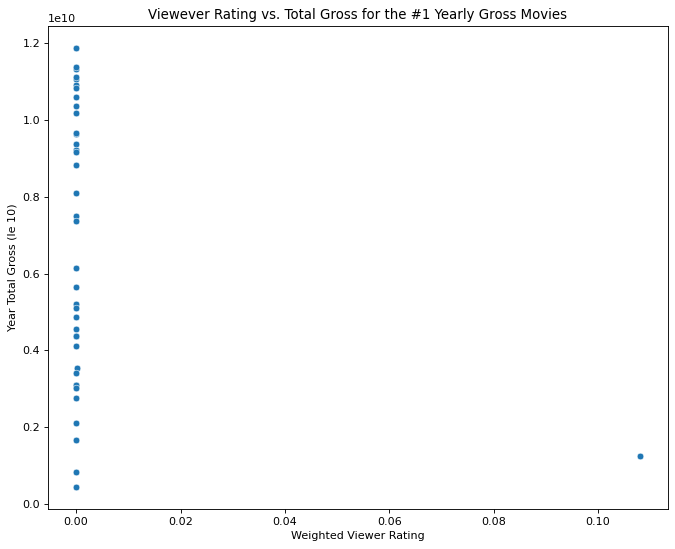

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines 
from matplotlib.pyplot import figure 

plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 8), dpi=80)#sets the figure/graph size


#creates scatterplot with year data (from data dataframe) as x values and 
#lifeExp data (from data dataframe) as y values 
ax=sns.scatterplot(x='weighted_rating', y='Total Gross', data=temp) 

plt.xlabel('Weighted Viewer Rating') #y label
plt.ylabel('Year Total Gross (le 10)')#x label
plt.title("Viewever Rating vs. Total Gross for the #1 Yearly Gross Movies") #makes title

plt.show()


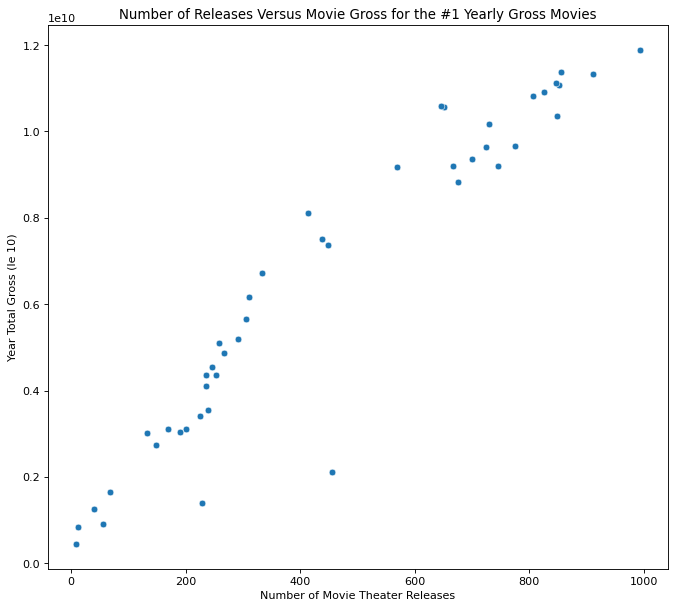

In [22]:
plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 9), dpi=80)#sets the figure/graph size

#creates scatterplot with year data (from data dataframe) as x values and 
#lifeExp data (from data dataframe) as y values 
ax=sns.scatterplot(x='NumberOfReleases', y='Total Gross', data=temp) 

plt.xlabel('Number of Movie Theater Releases') #y label
plt.ylabel('Year Total Gross (le 10)')#x label
plt.title("Number of Releases Versus Movie Gross for the #1 Yearly Gross Movies") #makes title

plt.show()

In [296]:
# for index, row in movie_gross.iterrows():
#     x=full_table.loc[full_table['title']== row['#1 Release']]['genre_list']
#     after=full_table.loc[full_table["releaseYear"].astype(int) > row['Year']]
    
#     for t, df in after.groupby('releaseYear'):
    

In [295]:
# reg=[str(x).split(',') if pd.notnull(x) else x for x in full_table['genres']]
# full_table['genre_list']=reg
# full_table.head()
